<a href="https://colab.research.google.com/github/Kevincancino26/Control-de-calidad--filtrador-de-incidencia-/blob/main/Copia_de_filtrador_de_incidentes_por_mes_Rev0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtrador de incidentes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Filtrador de incidentes internos por mes mayo


In [ ]:
# URL para exportar la hoja del calculo del archivo como CSV usando el GID correcto
url = "https://docs.google.com/spreadsheets/d/1GZ1MTUx_56IofU9eH-ar0kyZebn5eEpr/export?format=csv&gid=1100655380"

# Cargar los datos, ajustando el encabezado si es necesario (puede ser header=0, 1 o 2 según el archivo)
df_ = pd.read_csv(url, header=1)

# Verificar columnas disponibles
print("Columnas encontradas:", df_.columns.tolist())

Columnas encontradas: ['FECHA', 'CAUSA A RAIZ DE LA INCIDENCIA (C)', 'CAUSA A RAIZ DE LA INCIDENCIA (CI)', 'ORDEN DE SERVICO', 'VEHICULO ', 'ASESOR', 'TECNICO ', ' lavador', 'Observaciones', 'Unnamed: 9', 'CAUSAS DE INCIDENCIA', 'CANT']


In [ ]:
# Contar incidencias según la categoría 'CAUSA A RAIZ DE LA INCIDENCIA (CI)'
columna_ci = 'CAUSA A RAIZ DE LA INCIDENCIA (CI)'

conteo = df_['CAUSA A RAIZ DE LA INCIDENCIA (CI)'].dropna().value_counts()

for incidencia, cantidad in conteo.items():
    print(f"{incidencia}: {cantidad}")

SIN OBSERVACION: 244
SIN TAPETE: 119
SIN PLASTICO NI TAPETE: 34
SIN POLIZA EN VEHICULO: 29
SIN TAPETE NI PLASTICO AL VOLANTE: 20
FALTA DE SELLO EN POLIZA AL MOMENTO DE INSPECCION: 16
RINES SUCIOS: 5
LLANTAS A DIFERENTE PRESION: 3
USO DE HOJA CON NUMERO (SIN CONO): 2
CON COSAS DEL CLIENTE: 2
NIVEL BAJO DE ANTICONGELANTE: 2
NO SE CAMBIO LA FECHA POR CAMBIO DE BATERIA: 2
CASO S10 RESPCECTO AL ACEITE: 2
SIN REINICIO DE ACITE: 2
SIN PLASTICO AL VOLANTE: 1
SERVICIO TARDIO: 1
REAPARECE "POTENCIA EN MOTOR REDUCIRDA: 1
BIRLO DE SEGURIDAD(OLVIDADO): 1
RETORNO A LAVADO: 1
INTERIORES SUCIOS: 1
SIN POLIZA EN VEHICULO : 1
CON LEVE POLVO EN CARROCERIA (SE LAVO UN DIA ANTES): 1
TESTIGO DE PRECION EN LLANTAS: 1
CARROCERIA SUCIA: 1
TAPICERIA SUCIA: 1


In [ ]:
# Contar incidencias según la categoría
columna_ci = 'CAUSA A RAIZ DE LA INCIDENCIA (CI)'
conteo = df_[columna_ci].dropna().value_counts()
# Contar incidencias, eliminando nulos
conteo = df_[columna_ci].dropna()

# Convertir el conteo a DataFrame
df_conteo = conteo.reset_index()
df_conteo.columns = ['Causa raíz', 'Cantidad']

# Exportar a Excel
df_conteo.to_excel('conteo_causas_raiz.xlsx', index=False)

print("Archivo Excel guardado como 'conteo_causas_raiz.xlsx'")

Archivo Excel guardado como 'conteo_causas_raiz.xlsx'


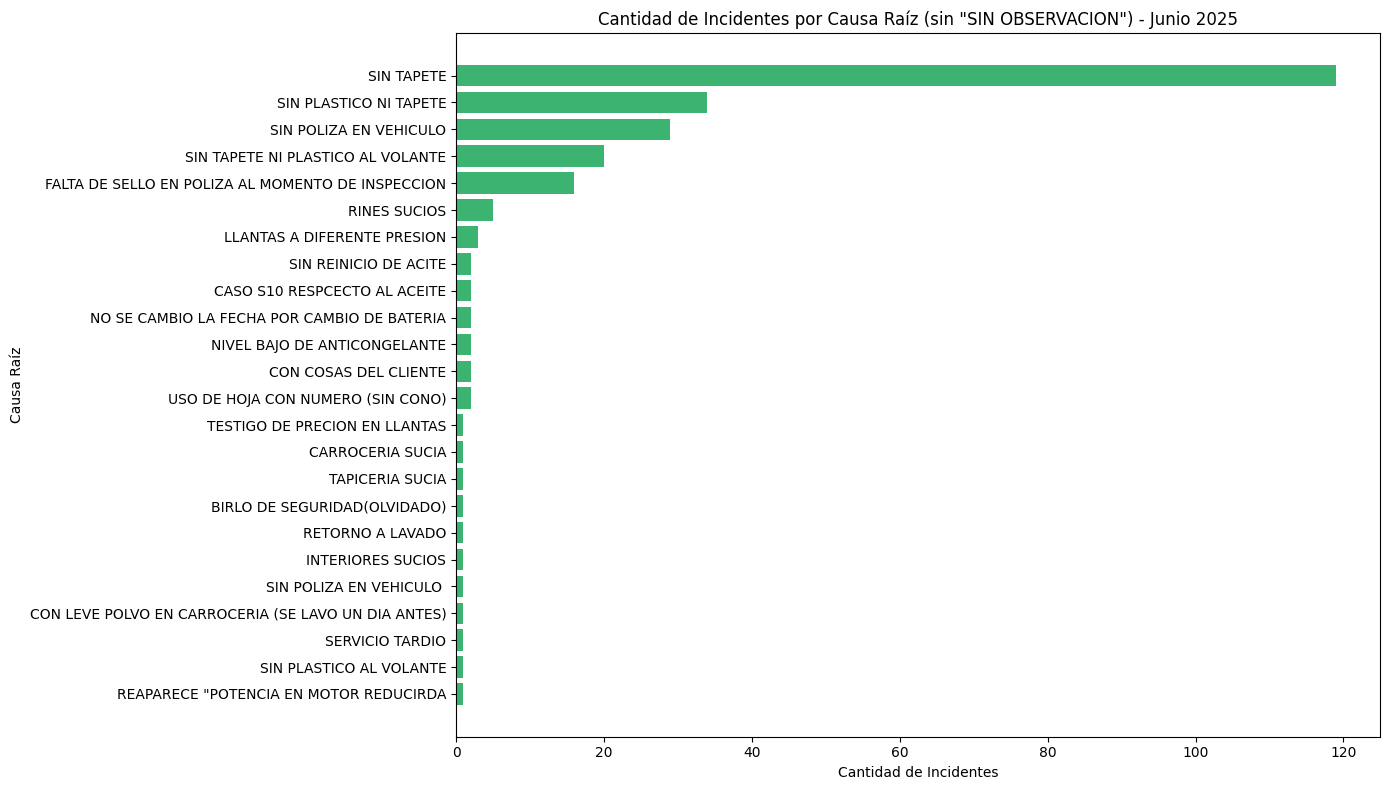

In [ ]:

# Filtrar las que NO contienen "sin observacion" (ignorando mayúsculas/minúsculas)
filtro = ~conteo.str.lower().str.contains("sin observacion")
conteo_filtrado = conteo[filtro].value_counts()

# Ordenar de menor a mayor para que en barh() se vea de mayor a menor visualmente (de arriba hacia abajo)
conteo_ordenado = conteo_filtrado.sort_values(ascending=True)

# Crear figura y eje
fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(conteo_ordenado.index, conteo_ordenado.values, color='mediumseagreen')
ax.set_title('Cantidad de Incidentes por Causa Raíz (sin "SIN OBSERVACION") - Junio 2025')
ax.set_xlabel('Cantidad de Incidentes')
ax.set_ylabel('Causa Raíz')
plt.xticks(rotation=0)
plt.tight_layout()

# Guardar como imagen JPG
fig.savefig('incidentes_causa_raiz_junio2025.jpg', format='jpg', dpi=300)

# También puedes guardar la figura en una variable para otros usos
mi_figura = fig